In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Transfer Learning**

**Transfer Learning is Leverage a Working model's Existing Architecture and Learned Patterns for our own Problem**

# **Why Transfer Learning**



*  Can Leverage Existing Neural Network Architecture Similar to our own
*   Can Leverage Working Network Architecture Which Already Learned Pattern On Same Data.


# **Applications**
1- Computer Vision

2- NLP( Natural language Processing)





In [2]:
# Download And Become One With data

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

#Unzip The File

zip_ref = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_ref.extractall()
zip_ref.close()

--2022-02-05 16:50:52--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  45.1MB/s    in 3.6s    

2022-02-05 16:50:56 (45.1 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [6]:
# How Many Images in Each Folder

import os 

for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} Directories and {len(filenames)} Images in {dirpath} ")

There are 2 Directories and 0 Images in 10_food_classes_10_percent 
There are 10 Directories and 0 Images in 10_food_classes_10_percent/test 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/fried_rice 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/sushi 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/pizza 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/ramen 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/chicken_curry 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/hamburger 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/grilled_salmon 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/ice_cream 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/chicken_wings 
There are 0 Directories and 250 Images in 10_food_classes_10_percent/test/steak 
There are 

In [8]:
# Create Data Loader (Prepare The Data)


from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32               # THESE WORDS IN CAPITAL FORM REPRESENT THAT IT IS HYPERPARAMETERS

train_dir = '10_food_classes_10_percent/train'
test_dir = '10_food_classes_10_percent/test'

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print('Training Images')

train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size =IMAGE_SHAPE,
                                                          batch_size = BATCH_SIZE,
                                                          class_mode = 'categorical')


test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                        target_size = IMAGE_SHAPE,
                                                        batch_size= BATCH_SIZE,
                                                        class_mode = 'categorical')

Training Images
Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# **Introducing CallBacks**

**Call Backs are Extra Functionality You can add to you can add  to your model during Or after Training**

**Important Call Backs**

*   Tracking Experiments With Tensorboard Callback
*   Model Checkpoint With Checkpoint Callback
*   Shopping A model From Train (Early Stopping) 

**It is Basically a tool which can add helpful functionality to your model During Training**



In [16]:
# Create Tensorboard Callback



import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback


# **Exploring Tensorflow Hub**


**Tensorflow Hub is Repository of Tensorflow trained mod.In the past W Used Tensorflow to create our own model from very scratch. Now We can Access Pretrained Model**



**Image Net is Image Database . This is Huge Database Platform**

# **Building and Compiling Tensorflow Hub**

In [17]:
# Lets Compare two model 

resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4'
efficientnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'


In [18]:
# Import Dependencies

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [19]:
# Lets Make a Create Model

def create_model(model_url, num_classes=10):
  '''
  Takes  A Tensorflow Hub and Create Keras Sequential

  Args:

  model_url (str) : Tensorflow Hub Feature Extraction
  num_classes (int) :   Number Of Output Neurons

  Returns :

  An Uncompiled Keras Sequential Model With Model_url as Feature Extraction 
  '''

  # Download Pretrained Model

  feature_extractor_layer = hub.KerasLayer(model_url, trainable=False, input_shape = IMAGE_SHAPE+(3,)) # Because of Freeze Already Learned patterns

  # Create Our Own Model

  model= tf.keras.Sequential([
                              feature_extractor_layer, 
                              layers.Dense(num_classes,activation='softmax',name= 'output_layer'
                              )])
  
  return model





# **Creating and Testing Resnet Tensorflow Hub**

In [33]:
# Create Resnet Model

resnet_model = create_model(resnet_url, num_classes= train_data_10_percent.num_classes)

# Compile Resnet Model

resnet_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)



# **Build Our Previous Model Out Of Water**

In [34]:
# Lets Fit our Resnet Model of Data

resnet_history = resnet_model.fit(train_data_10_percent,
                                  epochs=5, 
                                  steps_per_epoch= len(train_data_10_percent),
                                  validation_data = test_data_10_percent,
                                  validation_steps = len(test_data_10_percent),
                                  callbacks = [create_tensorboard_callback(dir_name= 'Tensorflow_hub',
                                                                            experiment_name = 'resnet50V2')] 
                                  )

Saving TensorBoard log files to: Tensorflow_hub/resnet50V2/20220205-180608
Epoch 1/5
24/24 [==============================] - 27s 962ms/step - loss: 1.9671 - accuracy: 0.3320 - val_loss: 1.1759 - val_accuracy: 0.6392
Epoch 2/5
24/24 [==============================] - 22s 932ms/step - loss: 0.8942 - accuracy: 0.7253 - val_loss: 0.8283 - val_accuracy: 0.7324
Epoch 3/5
24/24 [==============================] - 22s 929ms/step - loss: 0.6040 - accuracy: 0.8253 - val_loss: 0.7310 - val_accuracy: 0.7616
Epoch 4/5
24/24 [==============================] - 21s 918ms/step - loss: 0.4671 - accuracy: 0.8853 - val_loss: 0.6786 - val_accuracy: 0.7820
Epoch 5/5
24/24 [==============================] - 21s 917ms/step - loss: 0.3742 - accuracy: 0.9213 - val_loss: 0.6454 - val_accuracy: 0.7852


In [35]:
# Changes Same Shapes As Number Of Classes 

# WOW! That is Incredible . Our Transfer Learning Feature Extractor Model out Performed all of The Previous Model

# **Plot The Loss Curves**

In [36]:
# Tidbit : You Could Put A Function Like This into A Script Called "Helper.py" and Import It into Colab

In [39]:
# Plot The Loss Curves 

import matplotlib.pyplot as plt

def plot_loss_curves(history):

  '''
  Return Seperate Loss Curves Of Training & Validation Metrics.

  Args:
  History : Tensorflow history object

  Return :
  Plot Of Training/ Validation Loss and Accuracy Metrics
  '''


  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy= history.history['val_accuracy']
  epochs = range(len(history.history['loss']))


  # Plot Loss 
  plt.plot(epochs,loss, label='Training_loss')
  plt.plot(epochs, val_loss, label ='Val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()


  # Plot Accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='Training_accuracy')
  plt.plot(epochs, val_accuracy, label='Val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

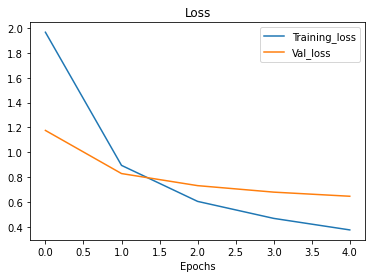

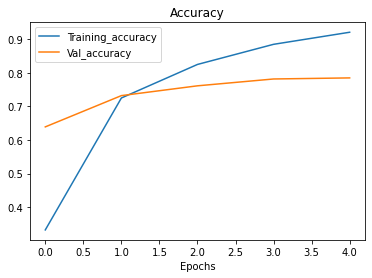

In [40]:
plot_loss_curves(resnet_history)

# **Creating and Testing Efficient NetB0 Tensorflow Hub Feature Extraction Model**

In [41]:
# Create EfficientNetB0 Feature Extraction

efficientnet_model = create_model(model_url = efficientnet_url, num_classes= train_data_10_percent.num_classes)

# Compile EfficientNetB0 Model 

efficientnet_model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)


# Fit The EfficientNet Model to 10% of Training Data

efficientnet_history = efficientnet_model.fit(
    train_data_10_percent,
    epochs=5, steps_per_epoch = len(train_data_10_percent),
    validation_data = train_data_10_percent,
    validation_steps = len(train_data_10_percent),
    callbacks = [create_tensorboard_callback(dir_name='tensorflow_hub', experiment_name='efficientnetb0')]
)

Saving TensorBoard log files to: tensorflow_hub/efficientnetb0/20220205-182607
Epoch 1/5
24/24 [==============================] - 23s 477ms/step - loss: 1.8424 - accuracy: 0.4080 - val_loss: 1.2757 - val_accuracy: 0.7453
Epoch 2/5
24/24 [==============================] - 9s 382ms/step - loss: 1.0442 - accuracy: 0.7813 - val_loss: 0.8280 - val_accuracy: 0.8333
Epoch 3/5
24/24 [==============================] - 9s 382ms/step - loss: 0.7452 - accuracy: 0.8413 - val_loss: 0.6370 - val_accuracy: 0.8667
Epoch 4/5
24/24 [==============================] - 9s 382ms/step - loss: 0.5992 - accuracy: 0.8747 - val_loss: 0.5275 - val_accuracy: 0.8947
Epoch 5/5
24/24 [==============================] - 9s 383ms/step - loss: 0.5047 - accuracy: 0.8947 - val_loss: 0.4533 - val_accuracy: 0.9080


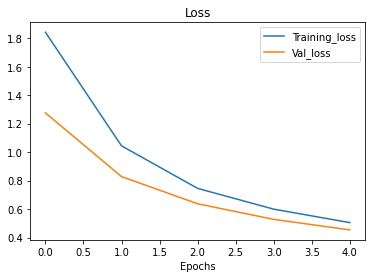

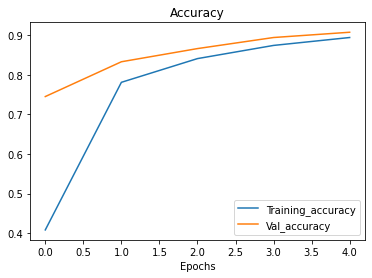

In [42]:
plot_loss_curves(efficientnet_history)

# **Types Of Transfer Learning**

* "As-is" Transfer Learning - Using An Existing Model With no Changes So far.

* "Feature-Extraction" Transfer Learning - Use The Prelearned Patterns Of Existing Model

* "Fine-Tuning" Transfer Learning - Use The Prelearned Patterns of Existing Model and "Fine-Tuning" Many or All The Underlaying Layer 
(Including New Output Layer)

In [43]:
# Tidbit : Fine Tuning Require More Data Then Feature Extraction

# **Compare Our Model Extraction**

**TensorBoard:**

**A way to Visualize Explore Your Machine Learning Model Performance and Intervals**

**- Provide Visualization**
**Tidbit : When You upload things to Tensorboard.dev , Your Experiment is Public. If You Are Running Private Experiment then don't upload them to tensorBoard.dev**

In [45]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot


***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./tensorflow_hub/

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&state=3MwjQEbTFur0eFHY6Ie7O1FQwnDnUB&prompt=consent&access_type=off

**After That Click Yes, Enter Secret Code(You can get from your Google Account)**

**And Your Data Will Be Public**

In [46]:
!tensorboard dev list

https://tensorboard.dev/experiment/phJqa6n1SOKnyon9LO8KHQ/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   phJqa6n1SOKnyon9LO8KHQ
	Created              2022-02-05 18:39:39 (4 minutes ago)
	Updated              2022-02-05 18:39:41 (4 minutes ago)
	Runs                 2
	Tags                 5
	Scalars              30
	Tensor bytes         0
	Binary object bytes  4059082
Total: 1 experiment(s)


In [47]:
!tensorboard dev list

https://tensorboard.dev/experiment/phJqa6n1SOKnyon9LO8KHQ/
	Name                 EfficientNetB0 vs. ResNet50V2
	Description          Comparing two different TF Hub feature extraction models architectures using 10% of training images
	Id                   phJqa6n1SOKnyon9LO8KHQ
	Created              2022-02-05 18:39:39 (5 minutes ago)
	Updated              2022-02-05 18:39:41 (5 minutes ago)
	Runs                 2
	Tags                 5
	Scalars              30
	Tensor bytes         0
	Binary object bytes  4059082
Total: 1 experiment(s)
